In [24]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

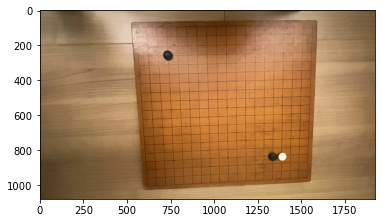

In [25]:
img = cv2.imread('./data/frame444.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [34]:
def Checking_RGB(img):
    img.shape[0]

    #print(R, G, B)
    for i in range(img.shape[0]): #vertical
        for j in range(img.shape[1]): #horizontal
            [R,G,B] = img[i, j,:]  

            if 120 < R and R < 250 :
                if 100 > B and B < 200:
                    return True #Hand Case
            return False #OK case 

In [27]:
frame_list = os.listdir('data')
frame_list.sort()

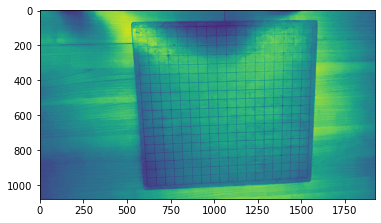

In [28]:
ROOT_path = 'E:\python_test\GO\go_game_extension-main (1)\go_game_extension-main\data'
img = cv2.imread(os.path.join(ROOT_path, frame_list[0]))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(img, (3,3), 0)
plt.imshow(img)
plt.show()

In [36]:
for i in range(len(frame_list)):
   img = cv2.imread(os.path.join(ROOT_path, frame_list[0]))
   img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   if Checking_RGB(img):
      print(frame_list[i])

frame0.jpg
frame1.jpg
frame10.jpg
frame100.jpg
frame1000.jpg
frame1001.jpg
frame1002.jpg
frame1003.jpg
frame1004.jpg
frame1005.jpg
frame1006.jpg
frame1007.jpg
frame1008.jpg
frame1009.jpg
frame101.jpg
frame1010.jpg
frame1011.jpg
frame1012.jpg
frame1013.jpg
frame1014.jpg
frame1015.jpg
frame1016.jpg
frame1017.jpg
frame1018.jpg
frame1019.jpg
frame102.jpg
frame1020.jpg
frame1021.jpg
frame1022.jpg
frame1023.jpg
frame1024.jpg
frame1025.jpg
frame1026.jpg
frame1027.jpg
frame1028.jpg
frame1029.jpg
frame103.jpg
frame1030.jpg
frame1031.jpg
frame1032.jpg
frame1033.jpg
frame1034.jpg
frame1035.jpg
frame1036.jpg
frame1037.jpg
frame1038.jpg
frame1039.jpg
frame104.jpg
frame1040.jpg
frame1041.jpg
frame1042.jpg
frame1043.jpg
frame1044.jpg
frame1045.jpg
frame1046.jpg
frame1047.jpg
frame1048.jpg
frame1049.jpg
frame105.jpg
frame1050.jpg
frame1051.jpg
frame106.jpg
frame107.jpg
frame108.jpg
frame109.jpg
frame11.jpg
frame110.jpg
frame111.jpg
frame112.jpg
frame113.jpg
frame114.jpg
frame115.jpg
frame116.jpg
frame

In [55]:
# img = cv2.Canny(img, 30, 50)
# plt.imshow(img)
# plt.show()

邊緣檢測 / 棋盤角落標記

In [56]:
contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
rect, area = None, 0
for item in contours:
	hull = cv2.convexHull(item)
	epsilon = 0.1 * cv2.arcLength(hull, True)
	approx = cv2.approxPolyDP(hull, epsilon, True)
	if len(approx) == 4 and cv2.isContourConvex(approx):
		ps = np.reshape(approx, (4,2))
		ps = ps[np.lexsort((ps[:,0],))]
		lt, lb = ps[:2][np.lexsort((ps[:2,1],))]
		rt, rb = ps[2:][np.lexsort((ps[2:,1],))]
		a = cv2.contourArea(approx)
		if a > area:
			area = a
			rect = (lt, lb, rt, rb)

if rect is None:
	print('Not Found！')
else:
	print('Coordinates：')
	print('\tLeft Top：(%d,%d)'%(rect[0][0],rect[0][1]))
	print('\tLeft Bottom：(%d,%d)'%(rect[1][0],rect[1][1]))
	print('\tRight Top：(%d,%d)'%(rect[2][0],rect[2][1]))
	print('\tRight Bottom：(%d,%d)'%(rect[3][0],rect[3][1]))


Coordinates：
	Left Top：(0,0)
	Left Bottom：(0,539)
	Right Top：(959,0)
	Right Bottom：(959,539)


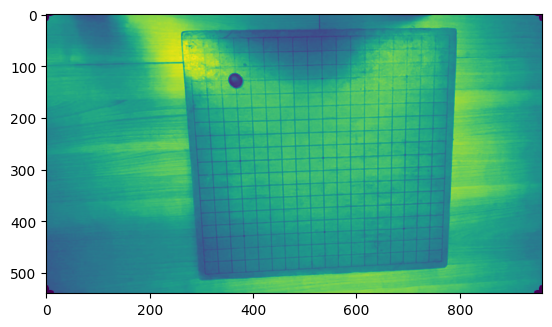

In [57]:
im = np.copy(img)
for p in rect:
	im = cv2.line(im, (p[0]-10,p[1]), (p[0]+10,p[1]), (0,0,255), 10)
	im = cv2.line(im, (p[0],p[1]-10), (p[0],p[1]+10), (0,0,255), 10)

plt.imshow(im)
plt.show()

- 圖片視覺矯正 
- 透視矯正

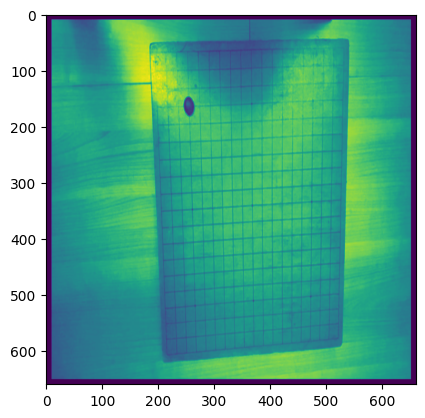

In [59]:
lt, lb, rt, rb = rect
pts1 = np.float32([(10,10), (10,650), (650,10), (650,650)])
pts2 = np.float32([lt, lb, rt, rb]) 
m = cv2.getPerspectiveTransform(pts2, pts1) 
board_gray = cv2.warpPerspective(img, m, (660, 660)) 
board_bgr = cv2.warpPerspective(img, m, (660, 660))
plt.imshow(board_gray)
plt.show()


In [60]:
# board_gray = img
circles = cv2.HoughCircles(board_gray, cv2.HOUGH_GRADIENT, 1, 20, param1=90, param2=16, minRadius=10, maxRadius=20) # 圆检测
xs = circles[0,:,0] # 所有棋子的x坐标
ys = circles[0,:,1] # 所有棋子的y坐标
xs.sort()
ys.sort()
k = 1
while xs[k]-xs[:k].mean() < 15:
	k += 1
	
x_min = int(round(xs[:k].mean()))
k = 1
while ys[k]-ys[:k].mean() < 15:
	k += 1
	
y_min = int(round(ys[:k].mean()))
k = -1
while xs[k:].mean() - xs[k-1] < 15:
	k -= 1

x_max = int(round(xs[k:].mean()))
k = -1
while ys[k:].mean() - ys[k-1] < 15:
	k -= 1

y_max = int(round(ys[k:].mean()))

if abs(600-(x_max-x_min)) < abs(600-(y_max-y_min)):
	v_min, v_max = x_min, x_max
else:
	v_min, v_max = y_min, y_max

lt = (v_min, v_min) # 棋盘网格左上角
lb = (v_min, v_max) # 棋盘网格左下角
rt = (v_max, v_min) # 棋盘网格右上角
rb = (v_max, v_max) # 棋盘网格右下角
pts1 = np.float32([[22, 22], [22, 598], [598, 22], [598, 598]])  # 棋盘四个角点的最终位置
pts2 = np.float32([lt, lb, rt, rb])
m = cv2.getPerspectiveTransform(pts2, pts1)
board_gray = cv2.warpPerspective(board_gray, m, (620, 620))
board_bgr = cv2.warpPerspective(board_gray)
k = -1
while xs[k:].mean() - xs[k-1] < 15:
	k -= 1

x_max = int(round(xs[k:].mean()))
k = -1
while ys[k:].mean() - ys[k-1] < 15:
	k -= 1

y_max = int(round(ys[k:].mean()))

if abs(600-(x_max-x_min)) < abs(600-(y_max-y_min)):
	v_min, v_max = x_min, x_max
else:
	v_min, v_max = y_min, y_max


lt = (v_min, v_min) # 棋盘网格左上角
lb = (v_min, v_max) # 棋盘网格左下角
rt = (v_max, v_min) # 棋盘网格右上角
rb = (v_max, v_max) # 棋盘网格右下角
pts1 = np.float32([[22, 22], [22, 598], [598, 22], [598, 598]])  # 棋盘四个角点的最终位置
pts2 = np.float32([lt, lb, rt, rb])
m = cv2.getPerspectiveTransform(pts2, pts1)
board_gray = cv2.warpPerspective(board_gray, m, (620, 620))
board_bgr = cv2.warpPerspective(board_bgr, m, (620, 620))
cv2.imshow('go', board_gray)
im = np.copy(board_bgr)
series = np.linspace(22, 598, 19, dtype=np.int)
for i in series:
	im = cv2.line(im, (22, i), (598, i), (0,255,0), 1)
	im = cv2.line(im, (i, 22), (i, 598), (0,255,0), 1)

# cv2.imshow('go', im)_bgr, m, (620, 620))
# cv2.imshow('go', board_gray)
im = np.copy(board_bgr)
series = np.linspace(22, 598, 19, dtype=np.int)
for i in series:
	im = cv2.line(im, (22, i), (598, i), (0,255,0), 1)
	im = cv2.line(im, (i, 22), (i, 598), (0,255,0), 1)

plt.imshow(im)
plt.show()

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'warpPerspective'
> Overload resolution failed:
>  - warpPerspective() missing required argument 'M' (pos 2)
>  - warpPerspective() missing required argument 'M' (pos 2)


In [61]:
def getChar(number):
    factor, moder = divmod(number, 26) # 26 字母个数
    modChar = chr(moder + 65)          # 65 -> 'A'
    if factor != 0:
        modChar = getChar(factor-1) + modChar # factor - 1 : 商为有效值时起始数为 1 而余数是 0
    return modChar
def getChars(length):
    return [getChar(index) for index in range(length)]

In [62]:
def Heise_zhanbi(img):
    [height, width, tongdao] = img.shape
    #print(width, height, tongdao)
    # cv2.imshow("3", img)
    # cv2.waitKey(20)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # cv2.imshow("binary", gray)
    # cv2.waitKey(100)

    # etVal, threshold = cv2.threshold(gray, 125, 255, cv2.THRESH_BINARY)
    # # cv2.imshow("threshold", threshold)
    # # cv2.waitKey(200)
    # a = 0
    # b = 0
    # for row in range(height):
    #     for col in range(width):
    #         val = threshold[row][col]
    #         if (val) == 0:#黑色
    #             a = a + 1
    #         else:
    #             b = b + 1

    a = np.sum(gray < 125)
    zhanbi = (float)(a) / (float)(height*width)
    #print("黑色像素个数", a, "黑色像素占比", zhanbi)
    return zhanbi

In [63]:
def Baise_zhanbi(img):
    [height, width, tongdao] = img.shape
    #print(width, height, tongdao)
    # cv2.imshow("3", img)
    # cv2.waitKey(20)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # cv2.imshow("binary", gray)
    # cv2.waitKey(100)

    # etVal, threshold = cv2.threshold(gray, 235, 255, cv2.THRESH_BINARY)
    # # cv2.imshow("threshold", threshold)
    # # cv2.waitKey(200)
    # a = 0
    # b = 0
    # for row in range(height):
    #     for col in range(width):
    #         val = threshold[row][col]
    #         if (val) == 0:#黑色
    #             a = a + 1
    #         else:
    #             b = b + 1
    b=np.sum(gray>235)
    zhanbi = (float)(b) / (float)(height*width)
    #print("白色像素个数", b, "白色像素占比", zhanbi)
    return zhanbi

In [64]:
def dingweiqizi_weizhi(img):
    '''********************************************
    1、定位棋盘位置
    ********************************************'''
    #img = cv2.imread("./screen/1.jpg")

    image = img.copy()
    w, h, c = img.shape
    img2 = np.zeros((w, h, c), np.uint8)
    img3 = np.zeros((w, h, c), np.uint8)
    # img = ImageGrab.grab() #bbox specifies specific region (bbox= x,y,width,height *starts top-left)

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower = np.array([10, 0, 0])
    upper = np.array([40, 255, 255])
    mask = cv2.inRange(hsv, lower, upper)
    erodeim = cv2.erode(mask, None, iterations=2)  # 腐蚀
    dilateim = cv2.dilate(erodeim, None, iterations=2)

    img = cv2.bitwise_and(img, img, mask=dilateim)
    frame = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, dst = cv2.threshold(frame, 100, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(dst, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)



    #cv2.imshow("0", img)

    i = 0
    maxarea = 0
    nextarea = 0
    maxint = 0
    for c in contours:
        if cv2.contourArea(c) > maxarea:
            maxarea = cv2.contourArea(c)
            maxint = i
        i += 1

    # 多边形拟合
    epsilon = 0.02 * cv2.arcLength(contours[maxint], True)
    if epsilon < 1:
        print("error :   epsilon < 1")
        pass

    # 多边形拟合
    approx = cv2.approxPolyDP(contours[maxint], epsilon, True)
    [[x1, y1]] = approx[0]
    [[x2, y2]] = approx[2]

    checkerboard = image[y1:y2, x1:x2]
    # cv2.imshow("1", checkerboard)
    # cv2.waitKey(1000)
    #cv2.destroyAllWindows()
    return checkerboard

In [65]:
def dingweiqizi_yanse_weizhi(img):
    '''********************************************
    2、识别棋盘棋子位置及颜色及序号；
    ********************************************'''
    #img = cv2.imread("./checkerboard/checkerboard_1.jpg")
    img = cv2.resize(img, (724,724), interpolation=cv2.INTER_AREA)
    #cv2.imshow("src",img)
    #cv2.waitKey(1000)

    #变量定义
    small_length=38  #每个小格宽高
    qizi_zhijing=38#棋子直径
    zuoshangjiao=20#棋盘四周的宽度

    list = [[0 for i in range(19)] for j in range(19)]
    #print(list)

    for i in range(19):
        for j in range(19):

            lie = i
            hang = j

            Tp_x = small_length * lie
            Tp_y = small_length * hang
            Tp_width = qizi_zhijing
            Tp_height = qizi_zhijing

            img_temp=img[Tp_y:Tp_y+Tp_height, Tp_x:Tp_x+Tp_width]#参数含义分别是：y、y+h、x、x+w

            heise_zhanbi=Heise_zhanbi(img_temp)
            if heise_zhanbi>0.5:
                list[hang][lie]=2#黑色
                #print("当前棋子为黑色")
            else:
                baise_zhanbi = Baise_zhanbi(img_temp)
                if baise_zhanbi > 0.15:
                    list[hang][lie] = 1  # 黑色
                    #print("当前棋子为白色")
                else:
                    list[hang][lie] = 0  # 黑色
                    #print("当前位置没有棋子")
            #print(heise_zhanbi)
    #cv2.imshow("2",img)
    #print("\n")
    #print(list)
    return  list

In [66]:
def biaozhunhuashuchu(list0,list1,list2,connter):
    a_array = np.array(list0)
    b_array = np.array(list1)
    d_array = b_array-a_array

    for i in range(19):
        for j in range(19):
            if d_array[i][j]>1:
                #pass
                print("第",i,"行，第",j,"列棋子为黑色：",i,j)
                A = getChars(i + 1)
                B = getChars(j + 1)
                str0 = str(connter) + str(A[i]) + str(B[j])
                #print(str0)
                list2.append(str0)
            elif d_array[i][j]>0:
                #pass
                print("第", i, "行，第", j, "列棋子为白色：", i, j)
                A = getChars(i+1)
                B = getChars(j+1)
                str0 = str(connter) + str(A[i]) + str(B[j])
                #print(str0)
                list2.append(str0)

    return list2

In [67]:
list0 = [[0 for i in range(19)] for j in range(19)]
list_finall = []
# imglist = sorted(glob("screen/*.jpg"))
connter = 0
# for i in imglist:
#img = cv2.imread("./screen/8.jpg")
img = cv2.imread('./data/frame101.jpg')
'''********************************************
1、定位棋盘位置
********************************************'''
img_after=dingweiqizi_weizhi(img)
#cv2.imshow("src",img)

'''********************************************
2、识别棋盘棋子位置及颜色及序号；
********************************************'''
list1=dingweiqizi_yanse_weizhi(img_after)

'''********************************************
3、标准化输出
********************************************'''
connter=connter+1
list_finall=biaozhunhuashuchu(list0,list1,list_finall,connter)
list0=list1
print(list_finall)

第 0 行，第 0 列棋子为黑色： 0 0
第 0 行，第 1 列棋子为黑色： 0 1
第 0 行，第 2 列棋子为黑色： 0 2
第 0 行，第 8 列棋子为黑色： 0 8
第 0 行，第 9 列棋子为黑色： 0 9
第 0 行，第 10 列棋子为黑色： 0 10
第 0 行，第 11 列棋子为黑色： 0 11
第 0 行，第 12 列棋子为黑色： 0 12
第 0 行，第 13 列棋子为黑色： 0 13
第 0 行，第 17 列棋子为黑色： 0 17
第 0 行，第 18 列棋子为黑色： 0 18
第 1 行，第 0 列棋子为黑色： 1 0
第 1 行，第 1 列棋子为黑色： 1 1
第 1 行，第 2 列棋子为黑色： 1 2
第 1 行，第 7 列棋子为黑色： 1 7
第 1 行，第 8 列棋子为黑色： 1 8
第 1 行，第 9 列棋子为黑色： 1 9
第 1 行，第 10 列棋子为黑色： 1 10
第 1 行，第 11 列棋子为黑色： 1 11
第 1 行，第 12 列棋子为黑色： 1 12
第 1 行，第 15 列棋子为黑色： 1 15
第 1 行，第 17 列棋子为黑色： 1 17
第 1 行，第 18 列棋子为黑色： 1 18
第 2 行，第 1 列棋子为黑色： 2 1
第 2 行，第 2 列棋子为黑色： 2 2
第 2 行，第 7 列棋子为黑色： 2 7
第 2 行，第 8 列棋子为黑色： 2 8
第 2 行，第 9 列棋子为黑色： 2 9
第 2 行，第 10 列棋子为黑色： 2 10
第 2 行，第 11 列棋子为黑色： 2 11
第 2 行，第 17 列棋子为黑色： 2 17
第 2 行，第 18 列棋子为黑色： 2 18
第 3 行，第 1 列棋子为黑色： 3 1
第 3 行，第 2 列棋子为黑色： 3 2
第 3 行，第 8 列棋子为黑色： 3 8
第 3 行，第 9 列棋子为黑色： 3 9
第 3 行，第 10 列棋子为黑色： 3 10
第 3 行，第 11 列棋子为黑色： 3 11
第 3 行，第 18 列棋子为黑色： 3 18
第 4 行，第 2 列棋子为黑色： 4 2
第 4 行，第 9 列棋子为黑色： 4 9
第 4 行，第 10 列棋子为黑色： 4 10
第 4 行，第 18 列棋子为黑色： 4 18
第 6 行，第 0 列棋